# Smartphone Price model  using MCMC

## Credit 
1) The Dataset was downloaded from Kaggle *Mobile Phones Specifications and Prices in Kenya*  https://www.kaggle.com/datasets/lyraxvinns/mobile-phones-specifications-and-prices-in-kenya

Code adapted from https://www.pymc.io/projects/docs/en/v3/pymc-examples/examples/getting_started.html


# Step 1: Import the basic libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import all the necessary libraries for Models
We need to import the following libraries from sklearn
      
      --> LinearRegression

 Import the test split function for spliting the training data from the test data
      --> train_test_split

In [2]:
# from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor
from sklearn.model_selection import train_test_split

## Import pandas library for data manipulation

In [3]:
import pandas as pd

# Step 2: Load the dataset to the platform

The Pandas library has an easy way to load in data, read_csv():

In [4]:
phoneprice = pd.read_csv("datasets/PhonesPriceInKenya.csv")

In order to view the data, how they are arranged we can use the head() function which shows the first 5 rows of data. To see the last five we use iris.head(-5)

In [5]:
phoneprice.head()

,Phone Title,Specs,Price(Kshs),Rating,Specs Score,Likes
0,Gionee M7 Power,"Screen:6.0 inches, 720 x 1440 pixels,Front Cam...","11,800",4.0,56%,13
1,Gionee M7,"Screen:6.01 inches, 1080 x 2160 pixels,Front C...","7,999",4.5,69%,8
2,Samsung Galaxy M21 6GB128GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...","22,590",4.3,100%,30
3,Samsung Galaxy M21 4GB64GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...","22,499",3.8,94%,31
4,Samsung Galaxy A31 6GB128GB,"Screen:6.4 inches, 1080 x 2400 pixels,Front Ca...","24,999",3.8,98%,31


## Step2: Preprocessing and Data Cleaning 
This data has comma separator in the **Price(Kshs)** and % sign in the **Specs Score** which is not regognized as interger,rather the dataframe sees the entry as a string. We use DataFrame.replace with regex=True for substrings replacement
1)We need to remove all the commas from the **Price(Kshs)**  

2)Remove the % sign from **Specs Score**

In [51]:
phoneprice['Price(Kshs)'] = phoneprice['Price(Kshs)'].replace(',','', regex=True)
phoneprice['Specs Score'] = phoneprice['Specs Score'].replace('%','', regex=True)
phoneprice

TypeError: 'DataFrame' object is not callable

select all rows with NaN values in Pandas DataFrame  Using isnull() to select all rows with NaN under a single DataFrame column

In [7]:
phoneprice[phoneprice['Price(Kshs)'].isnull()].count()

Phone Title    78
Specs          78
Price(Kshs)     0
Rating         78
Specs Score    78
Likes          78
dtype: int64

Convert all the numeric series to float datatype. This is to avoid situations that the entries are read as string

In [8]:
all_numeric_series = ['Price(Kshs)','Rating','Specs Score','Likes']
phoneprice[all_numeric_series] = phoneprice[all_numeric_series].astype(float)

Find the mean of the enries and use it to fill the NAN entries

In [9]:
mean_value_for_all = phoneprice[all_numeric_series].mean()
mean_value_for_all

Price(Kshs)    20453.197196
Rating             3.934408
Specs Score       67.733449
Likes             25.145470
dtype: float64

In [10]:
## Data Cleaning: Filling th missing values

In [11]:
[phoneprice.fillna(value=mean_value_for_all, inplace=True)]
phoneprice.isna().any() # Check if there are any null values

Phone Title    False
Specs          False
Price(Kshs)    False
Rating         False
Specs Score    False
Likes          False
dtype: bool

Check the statistics of the dataset with the **describe()** function e.g the mean, max etc

In [12]:
phoneprice.describe()

,Price(Kshs),Rating,Specs Score,Likes
count,1148.000000,1148.000000,1148.000000,1148.000000
mean,20453.197196,3.934408,67.733449,25.145470
std,26479.611414,0.757267,22.359441,32.155663
min,84.000000,1.300000,8.000000,1.000000
25%,1664.750000,3.400000,52.000000,7.000000
50%,13189.500000,4.000000,62.000000,14.000000
75%,24124.750000,4.500000,92.000000,29.250000
max,170000.000000,5.000000,100.000000,296.000000



# Step 3: Define the inputs and outputs

We now need to define the **features(inputs** and **labels(outputs)**. We can do this easily with pandas by slicing the data table and choosing certain rows/columns.

**input/features** are those characteristics of the data that determines the class that they belong e.g color, lenght, weight etc

**output** is the class that they belong e.g positive/negative, 0/1, hot/cold, present/absent etc

You can achieve this by naming all the column names within a double square parenthesis.

Another way to do this using **iloc()**


In [13]:
# Let's tell the dataframe which column we want for the imputs/features.  
X = phoneprice[['Rating','Specs Score','Likes']]

# Let's tell the dataframe which column we want for the target/labels/output.  
y = phoneprice['Price(Kshs)']

In [14]:
X.head()

,Rating,Specs Score,Likes
0,4.0,56.0,13.0
1,4.5,69.0,8.0
2,4.3,100.0,30.0
3,3.8,94.0,31.0
4,3.8,98.0,31.0


# Step 4: Split the data to training and testing sets. 
Remember the default percentage is 80% for training and 20% for testing but you can change the percentages using test_size

Assign the split data into diffent arrays

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [16]:
import pymc3 as pm
import arviz as az

In [40]:
X1 = X_train['Rating']
X2 = X_train['Specs Score']
Y=y_train

In [ ]:
with basic_model:
    mu = pm.Normal('mu', mu=0, sd=100)
    sd = pm.HalfCauchy('sd', beta=2)
    y = pm.Normal('y', mu=mu, sd=sd, observed=xs)
    trace = pm.sample(niter)

In [50]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=10000, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=100, shape=2)
    sigma = pm.HalfCauchy("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

TypeError: __init__() missing 1 required positional argument: 'beta'

In [46]:
# with basic_model:
#     # draw 500 posterior samples
#     trace = pm.sample(50, return_inferencedata=False)

In [47]:
with basic_model:
    trace = pm.sample(20, step=pm.Metropolis(), chains=2, cores=1, 
            progressbar = True)

/var/folders/8_/hd0tkl1d2jnbwbkkgd0ql1_h0000gn/T/ipykernel_49441/2053247314.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(20, step=pm.Metropolis(), chains=2, cores=1,
Only 20 samples in chain.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [beta]
>Metropolis: [alpha]


/Users/ednamilgo/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


Sampling 2 chains for 1_000 tune and 20 draw iterations (2_000 + 40 draws total) took 2 seconds.
/Users/ednamilgo/opt/anaconda3/lib/python3.9/site-packages/pymc3/sampling.py:643: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")


In [48]:
with basic_model:
    display(az.summary(trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,9999.73,0.65,9998.41,10000.46,0.13,0.09,26.86,56.86,0.99
beta[0],-103.68,3.05,-107.90,-99.79,1.64,1.27,3.82,6.46,2.60
beta[1],163.86,0.41,163.04,164.35,0.09,0.07,18.17,21.38,1.07
sigma,888.91,0.08,888.86,889.08,0.04,0.03,3.53,3.33,3.95


/Users/ednamilgo/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/density_utils.py:248: RuntimeWarning: divide by zero encountered in double_scalars
  t_j = np.power((c1 * (c2 / (N * f))), (2.0 / (3.0 + 2.0 * j)))
/Users/ednamilgo/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/density_utils.py:252: RuntimeWarning: divide by zero encountered in double_scalars
  out = t - (2 * N * np.pi ** 0.5 * f) ** (-0.4)
/Users/ednamilgo/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/density_utils.py:276: RuntimeWarning: invalid value encountered in double_scalars
  bw = (_bw_silverman(x) / np.ptp(x)) ** 2
/Users/ednamilgo/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/density_utils.py:760: RuntimeWarning: invalid value encountered in true_divide
  f = grid_counts / bin_width / len(x)
/Users/ednamilgo/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/density_utils.py:770: UserWarning: Something failed when estimating the bandwidth. Please check your data
  warnings.warn(

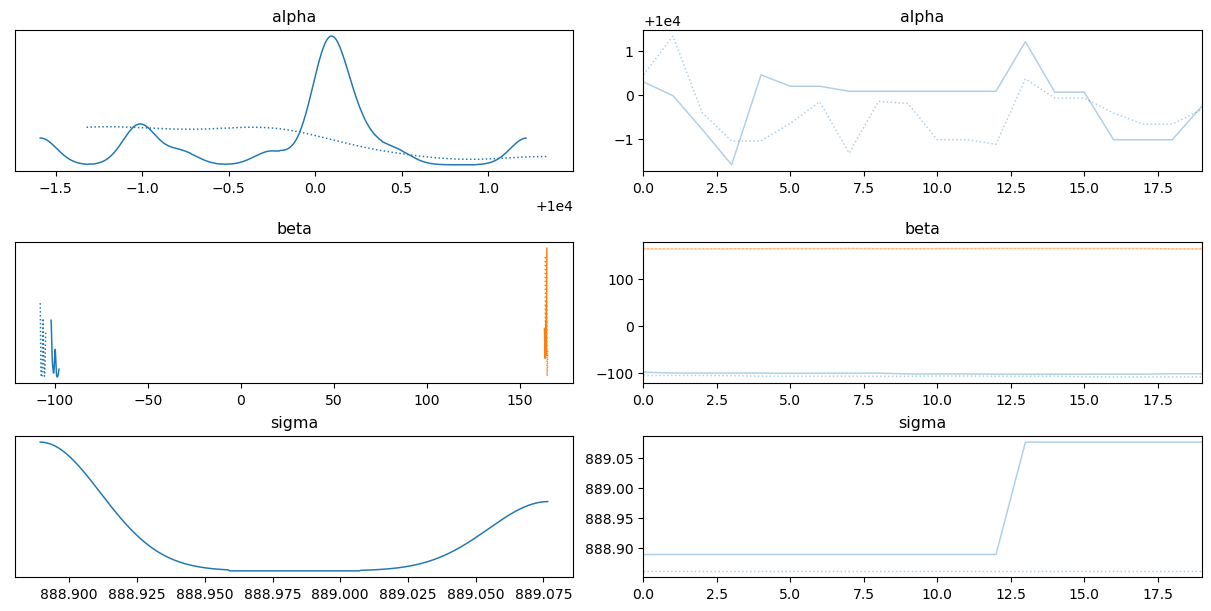

In [49]:
with basic_model:
    az.plot_trace(trace);